<a href="https://colab.research.google.com/github/radwa-reda/First_Project/blob/main/Kidney_diseases_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
from google.colab import drive

In [202]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [203]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/kidney_disease.csv')

In [204]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


**Prepare your data for Analysis & Modelling**

In [205]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/data_description.txt')

,1. Features:
0,id -id
1,age -age
2,bp -blood pressure
3,sg -specific gravity
4,al -albumin
5,su -sugar
6,rbc -red blood cells
7,pc - pus cell
8,pcc -pus cell clumps
9,ba -bacteria


In [206]:
columns= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/data_description.txt',sep='-')
columns=columns.reset_index()

In [207]:
columns.columns=['cols','dic_col_names']
columns

,cols,dic_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [208]:
columns['dic_col_names'].values

array(['id', 'age', 'blood pressure', 'specific gravity', 'albumin',
       'sugar', 'red blood cells', ' pus cell', 'pus cell clumps',
       'bacteria', 'blood glucose random', 'blood urea',
       'serum creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed cell volume', 'white blood cell count',
       'red blood cell count', 'hypertension', 'diabetes mellitus',
       'coronary artery disease', 'appetite', 'pedal edema', 'anemia',
       'class'], dtype=object)

In [209]:
df.columns=columns['dic_col_names'].values
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [210]:
df


,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [211]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [212]:
def convert_dtype(df,feature):
   df[feature]=pd.to_numeric(df[feature], errors='coerce')

In [213]:
features=['packed cell volume','white blood cell count','red blood cell count']

for feature in features:
  convert_dtype(df,feature)

In [214]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [215]:
df.drop('id',axis=1,inplace=True)

In [216]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [217]:
def extract_cat_num(df):
  cat_col=[col for col in df.columns if df[col].dtype =='object']
  num_col=[col for col in df.columns if df[col].dtype !='object']
  return cat_col,num_col

In [218]:
cat_col,num_col=extract_cat_num(df)

In [219]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'hypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [220]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [221]:
for col in cat_col:
  print('{} has {} values'.format(col,df[col].unique()))
  print('\n')

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


hypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary artery disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




In [222]:
df['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)
df['coronary artery disease']= df['coronary artery disease'].replace(to_replace='\tno',value='no')
df['class'] = df['class'].replace(to_replace='ckd\t',value='ckd')

In [223]:
for col in cat_col:
  print('{} has {} values'.format(col,df[col].unique()))
  print('\n')

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


hypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' nan] values


coronary artery disease has ['no' 'yes' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd'] values




  ###Checking features distribution


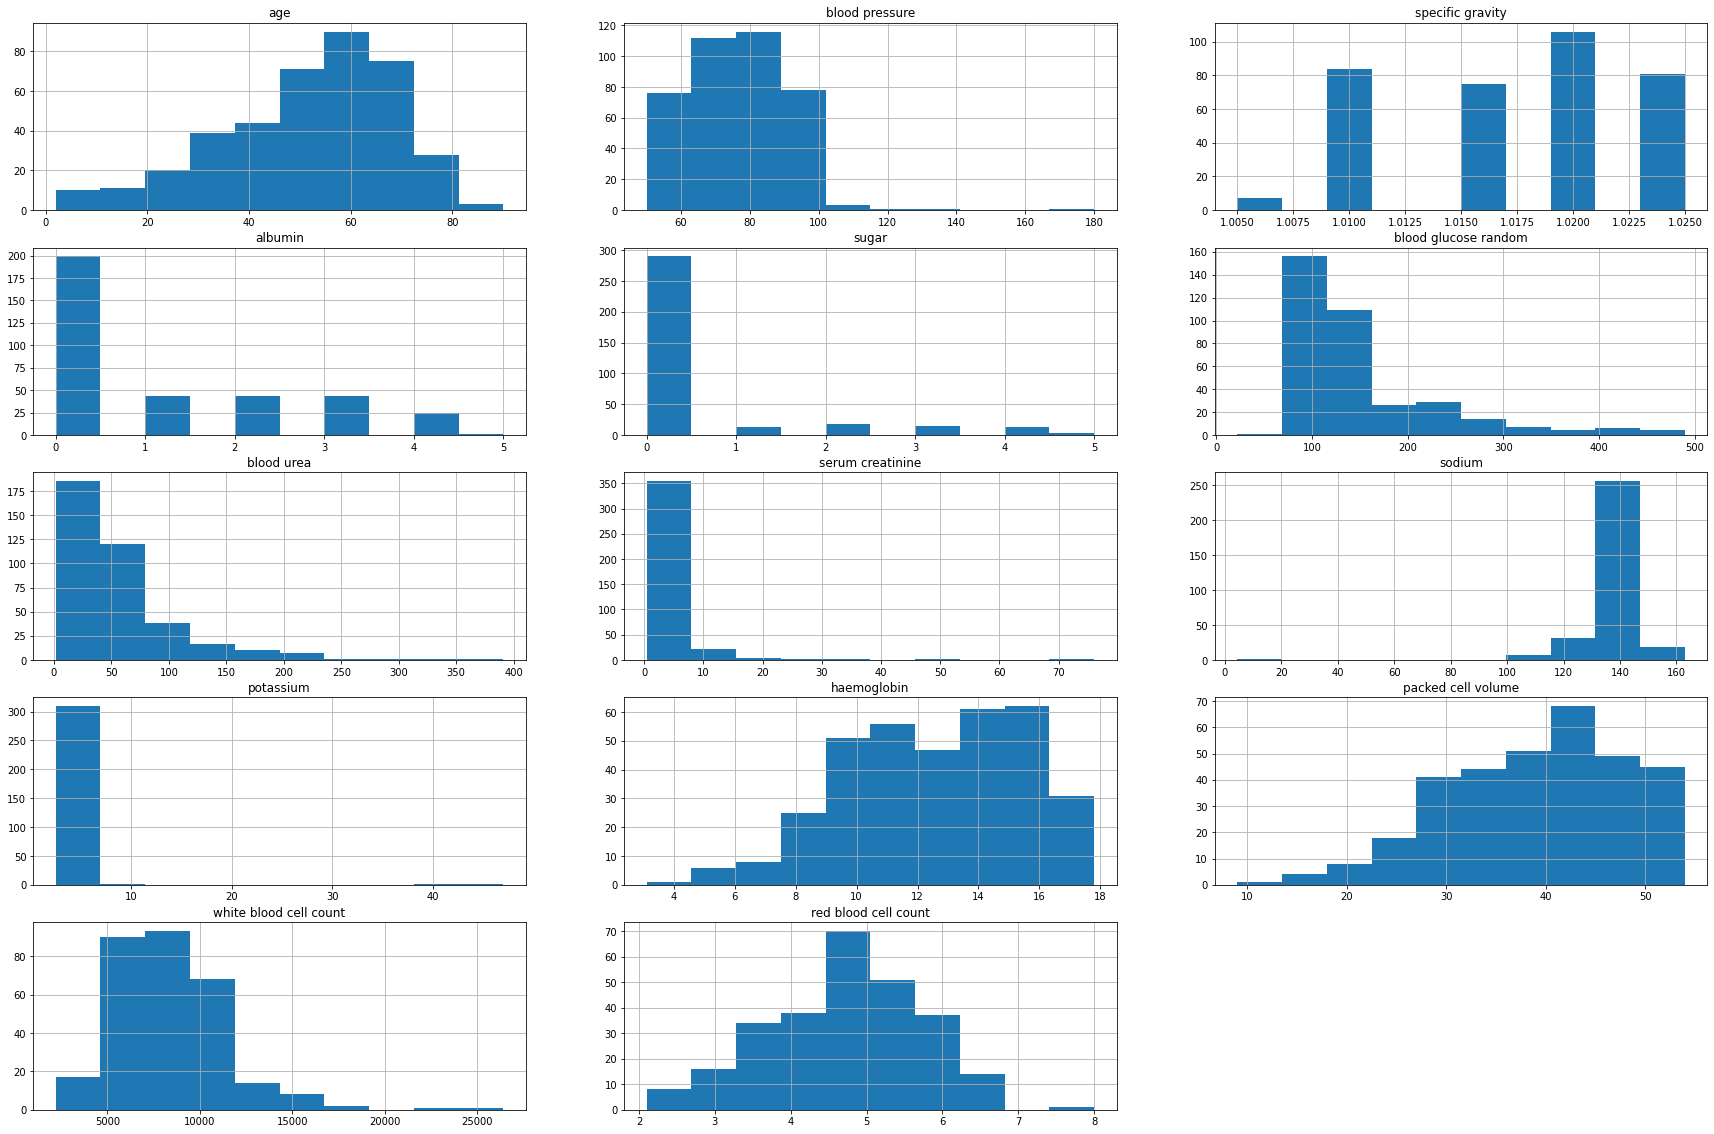

In [224]:
plt.figure(figsize=(30,20))


for i,feature in enumerate(num_col):
  plt.subplot(5,3,i+1)
  df[feature].hist()
  plt.title(feature)

    Observations:
        1.age looks a bit left skewed
        2.Blood gluscose random is right skewed
        3.Blood Urea is also a bit right skewed
        4.Rest of the features are lightly skewed

In [225]:
#ckd    , not ckd

In [226]:
len(cat_col)

11

**### Now, let's check the label distribution for categorical data**

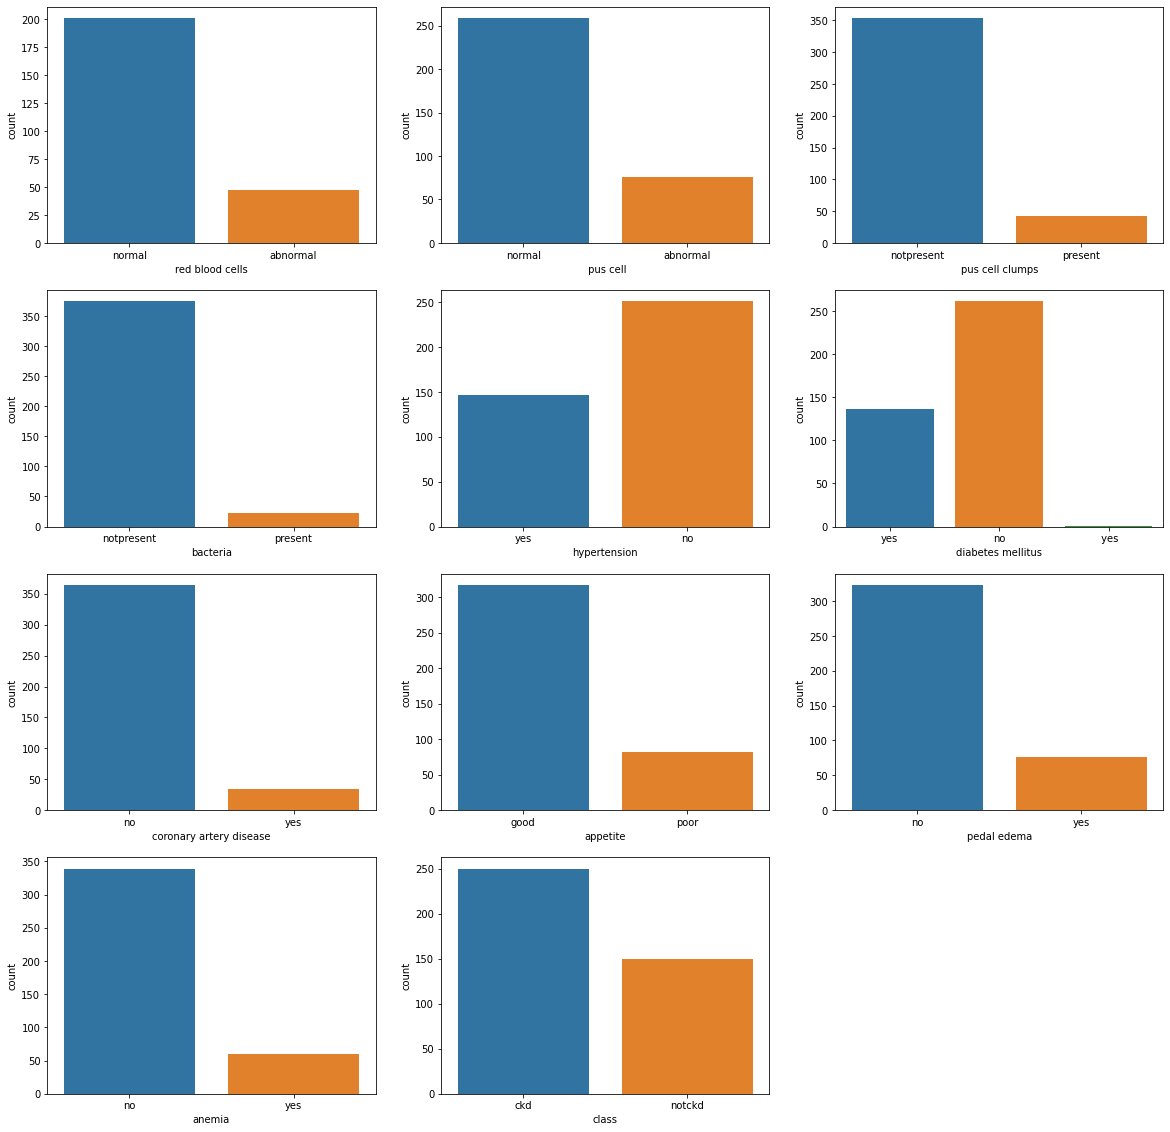

In [227]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
  plt.subplot(4,3,i+1)
  sns.countplot(df[feature])
  

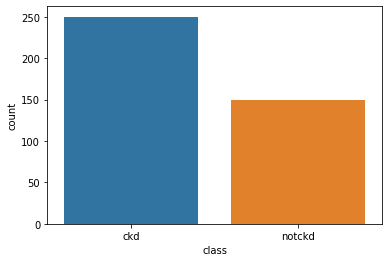

In [228]:
sns.countplot(df['class'])

Text(0.5, 1.0, 'target Class')

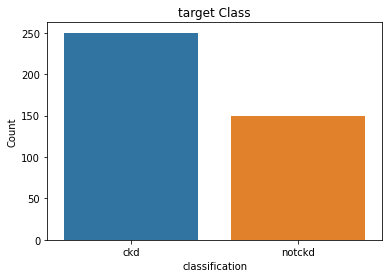

In [229]:
sns.countplot(x='class',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")

In [230]:
df.corr()


,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
blood pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
specific gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
blood glucose random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
blood urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
serum creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


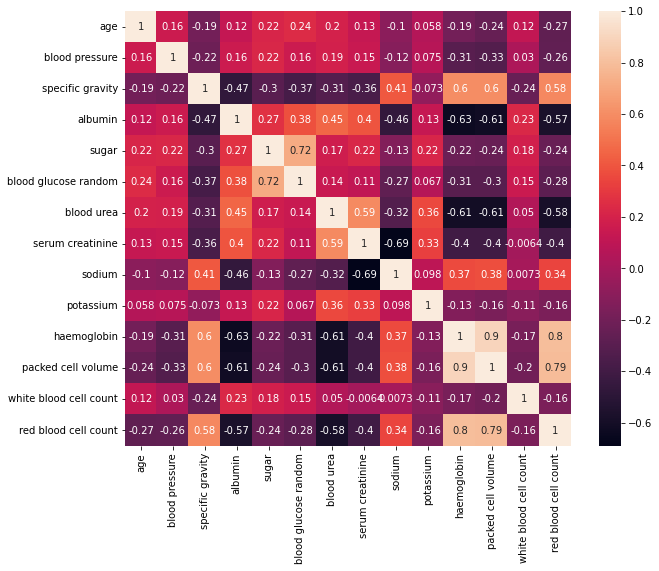

In [231]:
plt.figure(figsize=(10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

    Positive Correlation:
    
    Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin
    Sugar -> Blood glucose random
    Blood Urea -> Serum creatinine
    Hemoglobin -> Red Blood cell count <- packed cell volume
    
    
    Negative Correlation:
    Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
    Serum creatinine -> Sodium

In [232]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [233]:
import plotly.express as px

In [234]:
px.violin(df,y='red blood cell count',x="class", color="class")

In [235]:
px.scatter(df,'haemoglobin','packed cell volume')

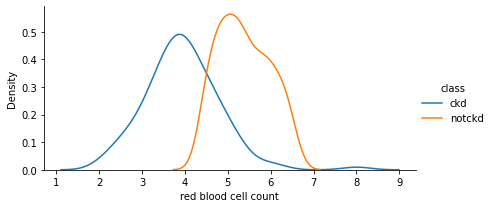

In [236]:
### analysing distribution of 'red_blood_cell_count' in both Labels 

grid=sns.FacetGrid(df, hue="class",aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

**    Both distributions are quite different, distribution CKD is quite normal and evenly distributed but not CKD distribution is a little bit left-skewed but quite close to a normal distribution**

In [237]:
# Defining violin and scatter plot & kde_plot functions
def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(df, x=col1, y=col2, color="class")
    return fig.show()

In [238]:
def kde_plot(feature):
    grid = sns.FacetGrid(df, hue="class",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

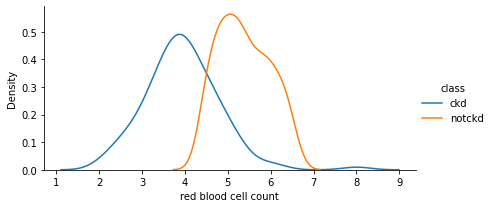

In [239]:
kde_plot('red blood cell count')

In [240]:
scatters('red blood cell count', 'packed cell volume')

In [241]:
scatters('red blood cell count', 'haemoglobin')

In [242]:
scatters('haemoglobin','packed cell volume')

    1.RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney  
    disease(i.e ckd).
    2.RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney 
    disease(i.e nockd).

In [243]:
violin('red blood cell count')

In [244]:
violin('packed cell volume')

In [245]:
scatters('red blood cell count','albumin')

In [246]:
scatters('packed cell volume','blood urea')

In [247]:
fig = px.bar(df, x="specific gravity", y="packed cell volume",
             color='class', barmode='group',
             height=400)
fig.show()

In [248]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [249]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [250]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'hypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

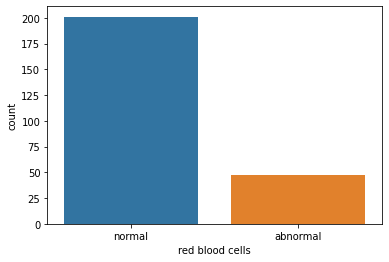

In [251]:
sns.countplot(df['red blood cells'])

In [252]:
data=df.copy()

In [253]:
data

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


**### filling missing with Random value**

In [254]:
data['red blood cells'].isnull().sum()

152

In [255]:
data['red blood cells'].dropna().sample()

61    normal
Name: red blood cells, dtype: object

In [256]:
random_sample=data['red blood cells'].dropna().sample(data['red blood cells'].isnull().sum())
random_sample

397      normal
250      normal
272      normal
3        normal
311      normal
         ...   
232    abnormal
292      normal
252      normal
305      normal
55     abnormal
Name: red blood cells, Length: 152, dtype: object

In [257]:
random_sample.index

Int64Index([397, 250, 272,   3, 311, 288, 399, 386, 284, 398,
            ...
             74,  91, 134, 375, 247, 232, 292, 252, 305,  55],
           dtype='int64', length=152)

In [258]:
data[data['red blood cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [259]:
random_sample.index=data[data['red blood cells'].isnull()].index

In [260]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [261]:
random_sample

0        normal
1        normal
5        normal
6        normal
10       normal
         ...   
309    abnormal
322      normal
349      normal
350      normal
381    abnormal
Name: red blood cells, Length: 152, dtype: object

In [262]:
data.loc[data['red blood cells'].isnull(),'red blood cells']=random_sample

In [263]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


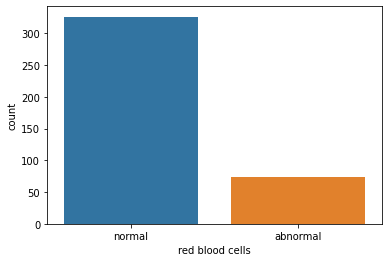

In [264]:
sns.countplot(data['red blood cells'])

In [265]:
data['red blood cells'].value_counts()/len(data)

normal      0.815
abnormal    0.185
Name: red blood cells, dtype: float64

In [266]:
len(df[df['red blood cells']=='normal'])/248

0.8104838709677419

In [267]:
len(df[df['red blood cells']=='abnormal'])/248

0.18951612903225806

In [268]:
### lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample


In [269]:

Random_value_imputation('red blood cells')
Random_value_imputation(' pus cell')

In [270]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            4
bacteria                   4
hypertension               2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anemia                     1
class                      0
dtype: int64

In [271]:
mode=data['pus cell clumps'].mode()[0]
mode

'notpresent'

In [272]:

data['pus cell clumps']=data['pus cell clumps'].fillna(mode)

In [273]:
def impute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [274]:
for col in cat_col:
    impute_mode(col)

In [275]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [276]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

**### lets fill missing values in Numerical features using Random value Imputation**

In [277]:
for col in num_col:
    Random_value_imputation(col)

In [278]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [279]:
for col in cat_col:
    print('{} has {} categories'.format(col, data[col].nunique()))
    

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
hypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


**#### as we have just 2 categories in each feature then we can consider Label Encoder as it will not cause Curse of Dimensionality**

In [280]:
from sklearn.preprocessing import LabelEncoder

In [281]:
le = LabelEncoder()

In [282]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [283]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,95.0,...,38.0,6000.0,5.9,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


In [283]:
# //////////////////////////////////////////////////////////////////////////////////

In [284]:
from sklearn.feature_selection import SelectKBest#Also known as Information Gain
from sklearn.feature_selection import chi2

In [285]:
ind_col=[col for col in data.columns if col!='class']
dep_col='class'

In [286]:
X=data[ind_col]
y=data[dep_col]

In [287]:

ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [288]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x7ff3c9ad5950>)

In [289]:
#To get scores(rank) of feature,what we can do we can use scores function
ordered_feature.scores_

array([1.14471960e+02, 7.92953876e+01, 5.55831992e-03, 2.27263374e+02,
       9.25900952e+01, 8.01717791e+00, 1.35050375e+01, 2.52000000e+01,
       1.32000000e+01, 2.65100135e+03, 2.30134690e+03, 3.31606018e+02,
       2.77227607e+01, 2.42748610e+00, 1.30577938e+02, 3.31142029e+02,
       1.25627726e+04, 2.04652975e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [290]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

,Score
0,114.471960
1,79.295388
2,0.005558
3,227.263374
4,92.590095
5,8.017178
6,13.505038
7,25.200000
8,13.200000
9,2651.001348


In [291]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [292]:
features_rank=pd.concat([dfcolumns,datascores],axis=1)

In [293]:
features_rank

,0,Score
0,age,114.471960
1,blood pressure,79.295388
2,specific gravity,0.005558
3,albumin,227.263374
4,sugar,92.590095
5,red blood cells,8.017178
6,pus cell,13.505038
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2651.001348


In [294]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,age,114.471960
1,blood pressure,79.295388
2,specific gravity,0.005558
3,albumin,227.263374
4,sugar,92.590095
5,red blood cells,8.017178
6,pus cell,13.505038
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2651.001348


In [295]:
#fetch largest 10 values of Score column
features_rank.nlargest(10,'Score')

,Features,Score
16,white blood cell count,12562.772623
9,blood glucose random,2651.001348
10,blood urea,2301.346904
11,serum creatinine,331.606018
15,packed cell volume,331.142029
3,albumin,227.263374
14,haemoglobin,130.577938
0,age,114.471960
4,sugar,92.590095
18,hypertension,88.200000


In [296]:
selected_columns=features_rank.nlargest(10,'Score')['Features'].values

In [297]:
X_new=data[selected_columns]

In [298]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size=0.75)

In [299]:
print(X_train.shape)
print(X_test.shape)

(300, 10)
(100, 10)


In [300]:
## check whether dataset is imbalance or not
y_train.value_counts()

0    191
1    109
Name: class, dtype: int64

In [301]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier()

In [302]:
## Hyper Parameter Optimization with respect to XGBoost

params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [303]:
from sklearn.model_selection import RandomizedSearchCV

In [312]:
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [313]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [314]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [331]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [332]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=10)

In [333]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [337]:
classifier=XGBClassifier(colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=10)

## we have got this model on the basis of cross valudation & hyper-parameter optimization

In [338]:
classifier.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=10)

In [339]:
y_pred=classifier.predict(X_test)

In [340]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [341]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[55  4]
 [ 1 40]]


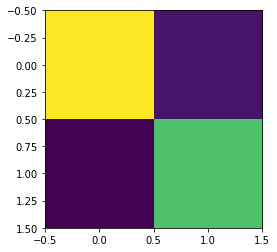

In [342]:
### to make confusion matrix user-friendly
plt.imshow(confusion)

In [343]:
accuracy_score(y_test, y_pred)

0.95